In [242]:
# import 
import numpy as np
import pandas as pd

from zipfile import ZipFile
from urllib.request import urlopen

import datetime
import glob
import os
from io import BytesIO

from requests import get
from os import path, getcwd, makedirs, listdir 


from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather the data

##### Get the files to from the server to the folder P7_files

In [ ]:
# create a file name P7_files
data_files = 'P7_files'
makedirs(data_files)

##### We have 3 different data sources in the web page. 
1. A CSV file for forgobike 2017 
2. A number of 12 zip files for forgobike 2018 for 12 months
3. A number of 4 zip files for forgobike 2019 for 4 months in year 2019
Note: There is another 5 months has a different name in 2019 wont be included here because they maigh be from different activities if we need to we easyly add another function for that. 

#### Load and save the data

In [8]:
# get the CSV 2017 file from the web page. 
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(data_files))


In [105]:
df_2017 = pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv',index_col=None, header=0)

#cheack when read
df_2017.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [106]:
# Save the 2017 data to CSV file 
df_2017.to_csv('./P7_files/2017-fordgobike-tripdata.csv', encoding='utf-8', index=False)

In [9]:
# Create a function the get the 2018 data. 
def get2018datazip(url):
    # FOR 12 MONTHS that we have for the fordgobike in 2018
    for month in range(1,13):
        month_string = str(month)
        month_leading_zero: str = month_string.zfill(2)
        ends_name = '-fordgobike-tripdata.csv.zip'
        # the if statment is to include all 12 months
        if '0' or '1' in month_leading_zero:
            bike_data_url = url +month_leading_zero + ends_name
            response = get(bike_data_url)
            unzipped_file = ZipFile(BytesIO(response.content))
            unzipped_file.extractall(data_files)

In [10]:
# get the 2018 data from the zip files into CSV files.
link_for2018 = 'https://s3.amazonaws.com/fordgobike-data/2018'
get2018datazip(link_for2018)

In [11]:
# Create a function the get the 2019 data. 
def get2019datazip(url):
    # FOR 4 MONTHS that we have for the fordgobike in 2019
    for month in range(1,5):
        month_string = str(month)
        month_leading_zero: str = month_string.zfill(2)
        ends_name = '-fordgobike-tripdata.csv.zip'
        if '0'in month_leading_zero:
            bike_data_url = url +month_leading_zero + ends_name
            response = get(bike_data_url)
            unzipped_file = ZipFile(BytesIO(response.content))
            unzipped_file.extractall(data_files)

In [12]:
# get the 2019 data from the zip files into CSV files.

link_for2019 = 'https://s3.amazonaws.com/fordgobike-data/2019'
get2019datazip(link_for2019)

In [4]:
# Get all the CSV files into one DataFrame. 
path = data_files # since this the same folder we just created
files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True, sort=False)

df.to_csv('master1.csv', index = False)

## Asses the Data:

In [315]:
df = pd.read_csv('master1.csv', low_memory=False) # the low memory is to avide Specify dtype option

In [316]:
df.shape

(3254325, 16)

In [317]:
# Make a copy call it df_master to work with and so we don't have to read the CSV again
df_master = df.copy()

In [318]:
df_master.shape

(3254325, 16)

In [319]:
df_master.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes


In [320]:
df_master.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3254320,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
3254321,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
3254322,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
3254323,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
3254324,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [321]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 397.3+ MB


In [322]:
sum(df_master.duplicated())

0

In [323]:
df_master.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12501
start_station_name          12501
start_station_latitude          0
start_station_longitude         0
end_station_id              12501
end_station_name            12501
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          218166
member_gender              217733
bike_share_for_all_trip    519700
dtype: int64

In [324]:
df_master.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,3.254325e+06,3.241824e+06,3.254325e+06,3.254325e+06,3.241824e+06,3.254325e+06,3.254325e+06,3.254325e+06,3.036159e+06
mean,8.743223e+02,1.209191e+02,3.776880e+01,-1.223530e+02,1.191966e+02,3.776874e+01,-1.223519e+02,2.729018e+03,1.983137e+03
std,2.468547e+03,1.030184e+02,1.029275e-01,1.601559e-01,1.029334e+02,1.342571e-01,3.220803e-01,1.724443e+03,1.043760e+01
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.000000e+01,1.878000e+03
25%,3.510000e+02,3.100000e+01,3.777106e+01,-1.224117e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.336000e+03,1.978000e+03
50%,5.570000e+02,8.800000e+01,3.778107e+01,-1.223983e+02,8.700000e+01,3.778127e+01,-1.223974e+02,2.579000e+03,1.985000e+03
75%,8.730000e+02,1.880000e+02,3.779539e+01,-1.222934e+02,1.860000e+02,3.779625e+01,-1.222935e+02,3.821000e+03,1.991000e+03
max,8.636900e+04,4.200000e+02,4.551000e+01,0.000000e+00,4.200000e+02,4.551000e+01,0.000000e+00,7.108000e+03,2.001000e+03


In [325]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 397.3+ MB


In [326]:
## How many rider that we have. 
df_master['bike_id'].count()

3254325

In [327]:
df_master.bike_id.sample()

1299188    2572
Name: bike_id, dtype: int64

In [328]:
# we have 6930 unique bike ids
df_master.bike_id.nunique()

6930

In [329]:
# to get the most freequant id biker
df_master['bike_id'].value_counts().idxmax()

4452

In [330]:
# A sample of the user type
df_master.user_type.sample()

30534    Subscriber
Name: user_type, dtype: object

In [331]:
# print the user types
df_master.user_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

##### The next step: 
1. Calculate the age
2. Create a reasonable group of age
3. Remove the outliers
4. Change the data type to appropriate one.



### Clean the Data:

In [332]:
# Add a new column that has the member age
df_master['member_age'] = 2019-df_master['member_birth_year']

In [333]:
df_master.member_age.sample()

1273325    23.0
Name: member_age, dtype: float64

In [334]:
df_master.member_age.max()

141.0

In [335]:
df_master.member_age.min()

18.0

In [336]:
df_master['member_age'].mean()


35.86324596307374

In [337]:
df_master.member_age.describe()

count    3.036159e+06
mean     3.586325e+01
std      1.043760e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.400000e+01
75%      4.100000e+01
max      1.410000e+02
Name: member_age, dtype: float64

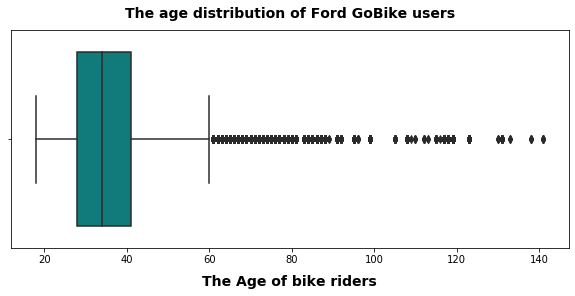

In [338]:
plt.figure(figsize=(10,4))
x = sns.boxplot(x='member_age', data=df_master, color='darkcyan')
x.set_title("The age distribution of Ford GoBike users", fontsize=14,y=1.03,fontweight='bold')
plt.xlabel("The Age of bike riders", fontsize=14,fontweight='bold', labelpad=10);


##### Looks like the oldest age we have is 141 years old and the minimum is 18 years old. and what above 60 years old consider outliers since the the average is 35 years old. But that means removing about 77k records  as you see below. 

In [339]:
df_age = df_master.query('member_age >60')
df_age.shape

(77055, 17)

In [340]:
df_master.shape

(3254325, 17)

In [341]:
# Keep records below 60, it automatically removes null values
df_master = df_master.query('member_age <=60')

In [342]:
df_master.member_age.min()

18.0

In [343]:
df_master['member_age'].mean()

35.04999858065144

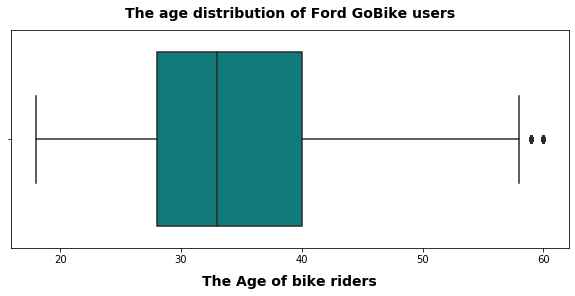

In [344]:
# The boxplot after removing the ages more than 60 years old
plt.figure(figsize=(10,4))
x = sns.boxplot(x='member_age', data=df_master, color='darkcyan')
x.set_title("The age distribution of Ford GoBike users", fontsize=14,y=1.03,fontweight='bold')
plt.xlabel("The Age of bike riders", fontsize=14,fontweight='bold', labelpad=10);


In [345]:
#Generate a new field for member age group from member_age_bin
df_master['member_age_bins'] = df_master['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [346]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959104 entries, 0 to 3254324
Data columns (total 18 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
member_age                 float64
member_age_bins            object
dtypes: float64(8), int64(2), object(8)
memory usage: 428.9+ MB


In [347]:
# change age and birth year to integer
df_master.member_age = df_master.member_age.astype(int)
df_master.member_birth_year = df_master.member_birth_year.astype(int)

In [348]:
# change the start time to datetime data type
df_master.start_time = pd.to_datetime(df_master.start_time)
df_master.end_time = pd.to_datetime(df_master.end_time)

In [349]:
# change the  user type, gender and bike_share_for_all_trip to category
df_master.user_type = df_master.user_type.astype('category')
df_master.member_gender = df_master.member_gender.astype('category')
df_master.bike_share_for_all_trip = df_master.bike_share_for_all_trip.astype('category')

In [350]:
# change bike id, start_station_id, end_station_id to object
df_master.bike_id = df_master.bike_id.astype(str)
df_master.start_station_id = df_master.bike_id.astype(str)
df_master.end_station_id = df_master.bike_id.astype(str)

In [351]:
# get start time month name
df_master['start_time_month_name']=df_master['start_time'].dt.strftime('%B')

In [352]:
# get start time month number
df_master['start_time_month']=df_master['start_time'].dt.month.astype(int)

In [353]:
# get start time weekdays
df_master['start_time_weekday']=df_master['start_time'].dt.strftime('%a')

In [354]:
# get start time day
df_master['start_time_day']=df_master['start_time'].dt.day.astype(int)

In [355]:
# get start time hour
df_master['start_time_hour']=df_master['start_time'].dt.hour


In [356]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959104 entries, 0 to 3254324
Data columns (total 23 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          int64
member_gender              category
bike_share_for_all_trip    category
member_age                 int64
member_age_bins            object
start_time_month_name      object
start_time_month           int64
start_time_weekday         object
start_time_day             int64
start_time_hour            int64
dtypes: category(3), datetime64[ns](2), float64(4), int64(6), object(8)
memory usage:

In [357]:
df_master.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,member_age_bins,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
2360607,620,2018-07-12 21:22:49.491,2018-07-12 21:33:10.349,2663,The Embarcadero at Sansome St,37.80477,-122.403234,2663,Steuart St at Market St,37.79413,...,1981,Female,No,38,30 - 40,July,7,Thu,12,21


##### In the next section we will be working in the next few sections with the variables Age, User Type and Gender,in all the areas in the dataset
##### 
1. We will take an overall view on the monthly usege,
2. then the weekly usege of all users, 
3. then we will split the data by the users type.
4. For each of the users type we will look deep into whether there are differing bahivoer based on gender or age.
5. Finally create a heatmap that shows the hourly useged 
6. Suggegesting and recommendation. 

### Part 1 Univariate Exploration:


##### What is the Monthly usege of the bike rides? 

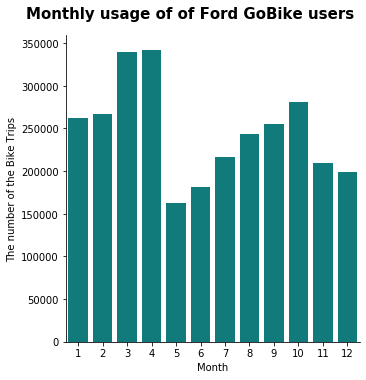

In [359]:
# monthly usege of the Bike Trips
x = sns.catplot(data=df_master, x='start_time_month', kind='count', color='darkcyan')
x.set_axis_labels("Month", "The number of the Bike Trips")
x.fig.suptitle('Monthly usage of of Ford GoBike users', y=1.05, fontsize=15, fontweight='bold')
plt.savefig('rids_each_months.png');

##### The months March, April and October have the most usage in the year for all users. 

###### Similar to what we did above let's see how users behavior in the weekdays.

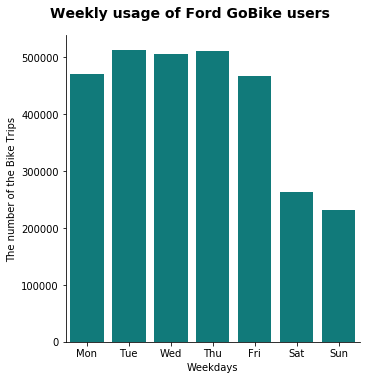

In [360]:
# set weekday to use it for order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# weekday usege of the system
x = sns.catplot(data=df_master, x='start_time_weekday', kind='count', color = 'darkcyan', order = weekday)
x.set_axis_labels("Weekdays", "The number of the Bike Trips")
x.fig.suptitle('Weekly usage of Ford GoBike users', y=1.05, fontsize=14, fontweight='bold')
plt.savefig('rides_weekdays.png');

###### In general the weekdays have more rides than weekends

### Part 2 Bivariate Exploration: 

###### Now let's take a look into the type of users 

In [361]:
# Create two main dataframe to work with 
customer = df_master.query('user_type == "Customer"')
subscriber = df_master.query('user_type == "Subscriber"')

In [362]:
# get the number of each User type
customer_count = customer['bike_id'].count()
subscriber_count = subscriber['bike_id'].count()

In [363]:
# Get the percentage of each user type of the main DataFrame
customer_group = customer_count / df_master['bike_id'].count()
subscriber_group = subscriber_count / df_master['bike_id'].count()

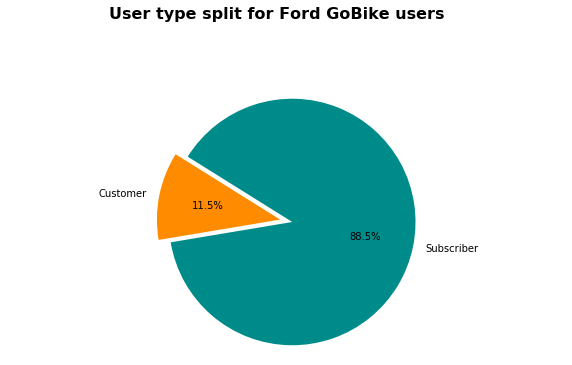

In [364]:
plt.figure(figsize = [10, 5])
# the pie chart
plt.subplot(1, 1, 1)

labels = ['Customer', 'Subscriber']
sizes = [customer_group, subscriber_group]
colors = ['darkorange', 'darkcyan']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=False, startangle=148)
plt.axis('equal')

plt.suptitle('User type split for Ford GoBike users', y=1.1, fontsize=16, fontweight='bold');

###### As you can see in the left side There are Only 11.5% of the users are customer whereas 88.5% are Subscriber

In [365]:
# Get the percentage of each gender for the customer type

cus_gender_female_count = customer.query('member_gender == "Female"')['bike_id'].count()
cus_gender_male_count = customer.query('member_gender == "Male"')['bike_id'].count()


customer_female = cus_gender_female_count / customer['bike_id'].count()
customer_male = cus_gender_male_count / customer['bike_id'].count()

In [366]:
# Get the percentage of each gender for the subscribers type

sub_gender_female_count = subscriber.query('member_gender == "Female"')['bike_id'].count()
sub_gender_male_count = subscriber.query('member_gender == "Male"')['bike_id'].count()


subscriber_female = sub_gender_female_count / subscriber['bike_id'].count()
subscriber_male = sub_gender_male_count / subscriber['bike_id'].count()


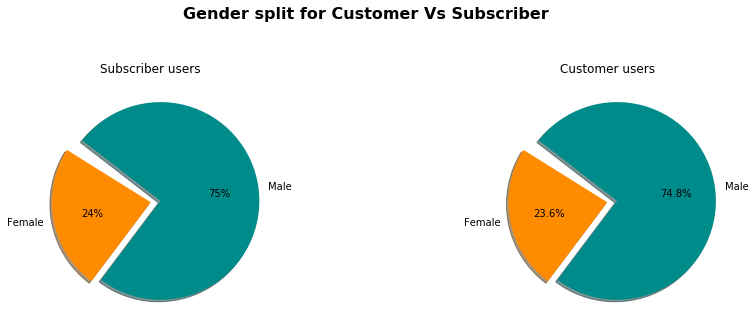

In [367]:

labels = ['Female', 'Male']
sizes1 = [customer_female, customer_male]
sizes2 = [subscriber_female, subscriber_male]
colors = ['darkorange', 'darkcyan']

# Make square figures and axes
plt.figure(1, figsize=(15,10))
the_grid = GridSpec(2, 2)

# the pie chart "Customer"
plt.subplot(the_grid[0,1], aspect=1, title='Customer users')
Cus_users_pie = plt.pie(sizes2, explode=(0, 0.1), labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=148)

# the pie chart "Subscriber"
plt.subplot(the_grid[0,0], aspect=1, title='Subscriber users')
sub_users_pie = plt.pie(sizes2, explode=(0, 0.1), labels=labels, colors = colors,
        autopct='%.0f%%', shadow=True, startangle=148)
plt.suptitle('Gender split for Customer Vs Subscriber', fontsize=16, fontweight='bold');

plt.show()

###### The trend in both user type is almost the same. The number of male is more in both of type users There almost no difference in the percentage of Female Vs Male between the Subscribers and the Customers as we can see on the pie charts above.  The males in customer  type of users are 74.8% whereas 23.6% are females . The males in the subscribers type of users are 75% whereas 24% are females.

### Part 3 - Multivariate Exploration:


Text(0.5, 1.013, 'Customer Vs Subscriber by the Group of Age for based on Gender ')

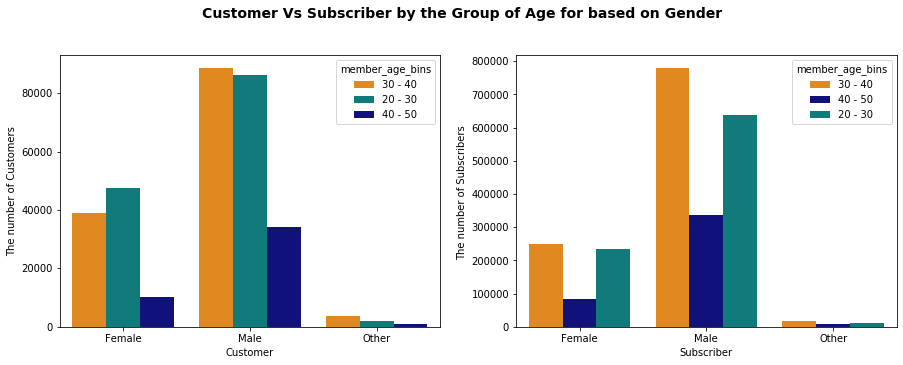

In [368]:
# set color to use in the next few charts
palette = {'20 - 30': 'darkcyan', '30 - 40': 'darkorange', '40 - 50': 'darkblue'}

plt.figure(figsize = [15, 5])

# the bar chart
plt.subplot(1, 2, 1)
bar_chart = sns.countplot(x="member_gender", hue="member_age_bins" 
                          , palette=palette, data=customer[customer['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])])

bar_chart.set_xlabel('Customer')
bar_chart.set_ylabel('The number of Customers')
plt.subplot(1, 2, 2)
bar_chart = sns.countplot(x="member_gender", hue="member_age_bins" 
                          , palette=palette, data=subscriber[subscriber['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])])
bar_chart.set_xlabel('Subscriber')
bar_chart.set_ylabel('The number of Subscribers ')
plt.suptitle('Customer Vs Subscriber by the Group of Age for based on Gender ', fontsize=14, y=1.013, fontweight='bold')


###### There is one siginfcant different btween Customers and subscribers for the group of Age based on Gender as you can see that the group of Age 20-30 are the most group for female in the customer type of users whereas the in the subscriber type the group of 30-40 of age for female have the highest number.  And both type of users have the same results for the male gender and others with the most number of users by the group of age. 

Text(0.5, 1.013, 'Customer Vs Subscriber by The number of the Bike Trips based on the Group of Age ')

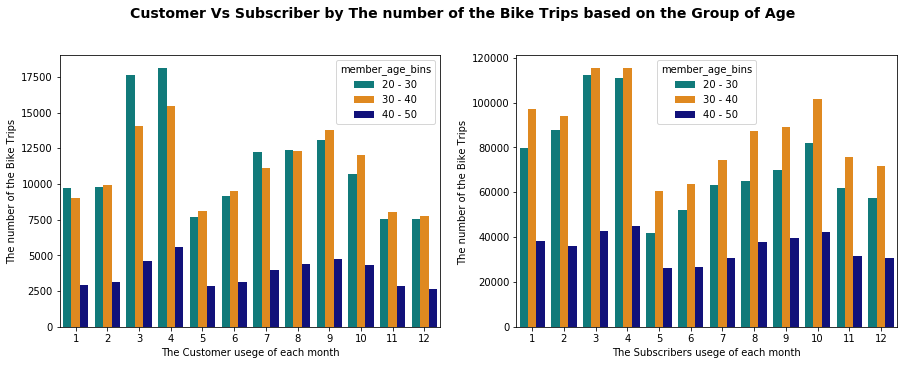

In [369]:
plt.figure(figsize = [15, 5])

# the bar chart
plt.subplot(1, 2, 1)
bar_chart = sns.countplot(x="start_time_month", hue="member_age_bins" 
                          , palette=palette, data=customer[customer['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])]
                          .sort_values(by=['start_time_month','member_age_bins']))

bar_chart.set_xlabel('The Customer usege of each month')
bar_chart.set_ylabel('The number of the Bike Trips')
plt.subplot(1, 2, 2)
bar_chart = sns.countplot(x="start_time_month", hue="member_age_bins" 
                          , palette=palette, data=subscriber[subscriber['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])]
                          .sort_values(by=['start_time_month','member_age_bins']))
bar_chart.set_xlabel('The Subscribers usege of each month')
bar_chart.set_ylabel('The number of the Bike Trips ')
plt.suptitle('Customer Vs Subscriber by The number of the Bike Trips based on the Group of Age ', fontsize=14, y=1.013, fontweight='bold')


###### In General the group of 30-40 of age in the subscribers type of years have the most usage of our system but this isn't always the case in the customer type of users as you can see on the left chart.  The Customer group differ in the few months where is the group of age 20-30 have the most trips and to be exact the months are Jan, Feb, March, April, July, Aug and The rest of the year the customer type of users have similar results of the subscribers type of ueres. Also we can see that the months 3,4 for both the users type has the most usage, and the months 8,9 and for both types of users have similar behavior whereas the it differ in the other months.

Text(0.5, 1.013, 'Customer Vs Subscriber by The number of the Bike Trips based on the Group of Age ')

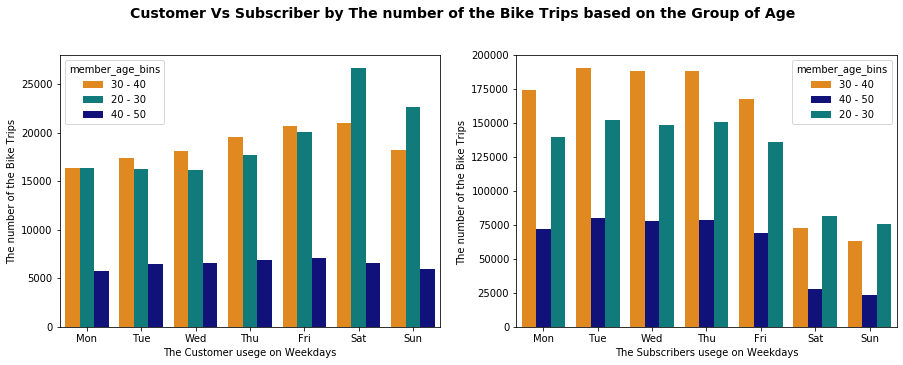

In [371]:
plt.figure(figsize = [15, 5])

# the bar chart
plt.subplot(1, 2, 1)
bar_chart = sns.countplot(x="start_time_weekday", hue='member_age_bins',palette=palette, data=customer[customer['member_age_bins']
                                                                                                                                              .isin(['20 - 30', '30 - 40', '40 - 50'])],order = weekday)

bar_chart.set_xlabel('The Customer usege on Weekdays')
bar_chart.set_ylabel('The number of the Bike Trips')
plt.subplot(1, 2, 2)
bar_chart = sns.countplot(x="start_time_weekday", hue='member_age_bins',palette=palette, data=subscriber[subscriber['member_age_bins']
                                                                                                                                              .isin(['20 - 30', '30 - 40', '40 - 50'])],order = weekday)
bar_chart.set_xlabel('The Subscribers usege on Weekdays')
bar_chart.set_ylabel('The number of the Bike Trips ')
plt.suptitle('Customer Vs Subscriber by The number of the Bike Trips based on the Group of Age ', fontsize=14, y=1.013, fontweight='bold')


##### An overall of the  Customer Vs Sub weekly usage as you can see in the charts above that the customer type of users have less usegs during the weekdays and more on the weekends whereas quite the opposite for the subscribers type of users raides more during the weekdays rather than weekends and the more interesting part here is that in both type of users the group of age 20-30 ride more on the weekends and the group of 30-40 of age rides more on weekdays.

### Conclusion:
<b>In general The months March and April and October have the most usage in the year for all users. <br>
In general the weekdays have more rides than weekends for all users.<br>
There are Only 11.5% of the users are customer whereas 88.5% are Subscriber<br>
The trend in both user type is almost the same. The number of male is more in both of type users There almost no difference in the percentage of Female Vs Male between the Subscribers and the Customers.  The males in customer  type of users are 74.8% whereas 23.6% are females . The males in the subscribers type of users are 75% whereas 24% are females.<br>
The most group of age in the Customer that use the system are 20-30 then 30-40 of age.<br>
The group of age 20-30 in the customer type of users for the female gender have the hi<br>
In General the group of 30-40 of age in the subscribers type of years have the most usage of our system but this isn't always the case in the customer type of users as you can see on the left chart. The Customer group differ in the few months where is the group of age 20-30 have the most trips and to be exact the months are Jan, Feb, March, April, July, Aug and The rest of the year the customer type of users have similar results of the subscribers type of ueres. Also we can see that the months 3,4 for both the users type has the most usage, and the months 8,9 and for both types of users have similar behavior whereas the it differ in the other months.<br>
An overall of the  Customer Vs Sub weekly usage as you can see in the charts above that the customer type of users have less usegs during the weekdays and more on the weekends whereas quite the opposite for the subscribers type of users raides more during the weekdays rather than weekends and the more interesting part here is that in both type of users the group of age 20-30 ride more on the weekends and the group of 30-40 of age rides more on weekdays.<br>
The most group of age in the subscribers that use the system are 30-40 then 20-30-40 of age.<br> The subscribers use the system more during the weekdays<b/>


In [372]:
# this to update the work we did and to use it for the Slide_Deck_Ford_GoBike as well
# it may take few minutes 
df_master.to_csv('master_updated.csv', index = False)